In [1]:
# dependencies

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Reading Data from csv

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\vscode\Cardio_Dataset.csv')
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Data preprocessing

In [3]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [4]:
df.shape

(68205, 17)

In [5]:
cols_to_remove = ['id','age','bp_category_encoded','bp_category']
df.drop(cols_to_remove,axis=1,inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [6]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68205 non-null  int64  
 1   height       68205 non-null  int64  
 2   weight       68205 non-null  float64
 3   ap_hi        68205 non-null  int64  
 4   ap_lo        68205 non-null  int64  
 5   cholesterol  68205 non-null  int64  
 6   gluc         68205 non-null  int64  
 7   smoke        68205 non-null  int64  
 8   alco         68205 non-null  int64  
 9   active       68205 non-null  int64  
 10  cardio       68205 non-null  int64  
 11  age_years    68205 non-null  int64  
 12  bmi          68205 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.8 MB


In [8]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


<Axes: xlabel='cardio', ylabel='count'>

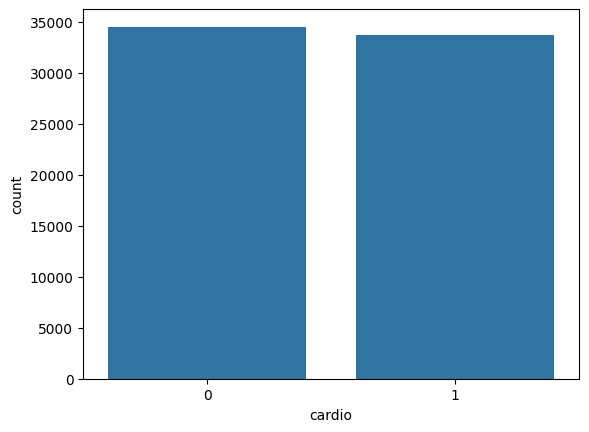

In [9]:
sns.countplot(data=df,x='cardio')

In [10]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

Correlations

In [11]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi'],
      dtype='object')

In [12]:
categorical = ['gender','cholesterol', 'gluc',
                'smoke', 'alco', 'active', 'cardio']

numerical = [col for col in df.columns if col not in categorical]

numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [13]:
corr = df[numerical].corr()

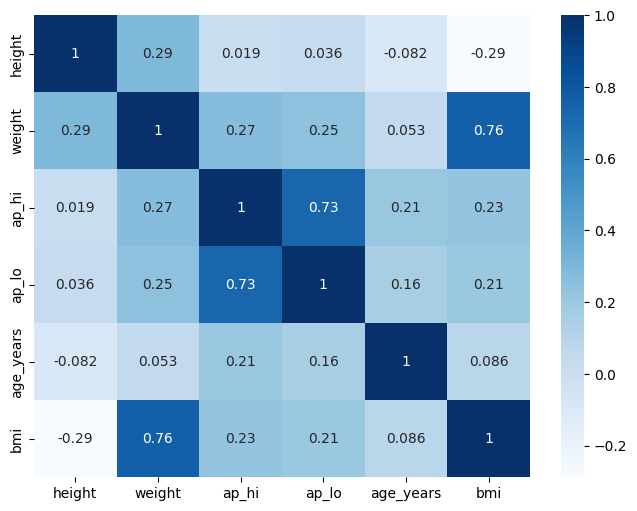

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='Blues')

plt.savefig('correaltion-heatmap.jpg')

Columns Distribution and Outliers

In [15]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [16]:
# for col in numerical:
#     plt.figure()
#     sns.kdeplot(df[col])

In [17]:
# for col in numerical:
#     plt.figure()
#     sns.boxplot(df[col])

Height Column

In [18]:
# fig,axs = plt.subplots(1,2)
# fig.set_figheight(6)
# fig.set_figwidth(12)
# sns.kdeplot(df['height'],ax=axs[0])
# sns.boxplot(df['height'],ax=axs[1])

In [19]:
# IQR, Boundary Values, pciles, yeojohnson

# df['height_log'] = np.log1p(df['height'])

In [20]:
# fig,axs = plt.subplots(1,2)
# fig.set_figheight(6)
# fig.set_figwidth(12)
# sns.kdeplot(df['height_log'],ax=axs[0])
# sns.boxplot(df['height_log'],ax=axs[1])

In [21]:
# pt = PowerTransformer()

# df['height_yj'] = pt.fit_transform(df['height'].values.reshape(-1,1))

# fig,axs = plt.subplots(1,2)
# fig.set_figheight(6)
# fig.set_figwidth(12)
# sns.kdeplot(df['height_yj'],ax=axs[0])
# sns.boxplot(df['height_yj'],ax=axs[1])

In [15]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


In [23]:
# df.drop(df.columns[-2:],axis=1,inplace=True)

In [16]:
FEATURES = [
    'age_years','gender','height','weight','ap_hi','ap_lo',
    'cholesterol','gluc','smoke','alco','active','bp_category'
]


numerical = [
    'age_years','height','weight','ap_hi','ap_lo',
    'cholesterol','gluc','smoke','alco','active'
]


In [25]:
# ct = ColumnTransformer(
#     transformers=[
#         ('robsc', RobustScaler(), numerical),
#         ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['bp_category'])
#     ],
#     remainder='drop'
# )


Splitting the data

In [17]:
X = df.drop('cardio', axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.75)

In [27]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [18]:
X_train.shape

(51153, 12)

In [19]:
numerical

['age_years',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [20]:
ct = ColumnTransformer(
    transformers=[
        ('robsc', RobustScaler(), X_train.columns)
    ],
    remainder='passthrough'
)


Scaling the numerical columns

In [22]:
# numerical

In [23]:
# ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
#                                      ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])],
#                         remainder='passthrough')

In [24]:
X_train_transformerd = ct.fit_transform(X_train)

In [25]:
X_train_transformerd

array([[ 0.        , -0.63636364,  1.11764706, ...,  0.        ,
        -1.2       ,  1.61844578],
       [ 1.        ,  0.36363636, -0.11764706, ..., -1.        ,
        -0.1       , -0.29427795],
       [ 0.        , -0.36363636, -0.70588235, ...,  0.        ,
        -1.3       , -0.5123487 ],
       ...,
       [ 1.        ,  1.45454545,  1.35294118, ...,  0.        ,
         0.2       ,  0.42461388],
       [ 0.        , -0.45454545, -0.82352941, ...,  0.        ,
        -1.4       , -0.59098173],
       [ 0.        ,  0.36363636, -0.23529412, ...,  0.        ,
        -1.1       , -0.40642182]], shape=(51153, 12))

In [26]:
ct.get_feature_names_out()

array(['robsc__gender', 'robsc__height', 'robsc__weight', 'robsc__ap_hi',
       'robsc__ap_lo', 'robsc__cholesterol', 'robsc__gluc',
       'robsc__smoke', 'robsc__alco', 'robsc__active', 'robsc__age_years',
       'robsc__bmi'], dtype=object)

In [27]:
pd.DataFrame(data=X_train_transformerd,columns=ct.get_feature_names_out())

,robsc__gender,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__cholesterol,robsc__gluc,robsc__smoke,robsc__alco,robsc__active,robsc__age_years,robsc__bmi
0,0.0,-0.636364,1.117647,0.5,1.0,0.0,0.0,0.0,0.0,0.0,-1.2,1.618446
1,1.0,0.363636,-0.117647,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.1,-0.294278
2,0.0,-0.363636,-0.705882,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.3,-0.512349
3,0.0,-0.363636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8,0.229044
4,0.0,-1.090909,-1.235294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,-0.730271
...,...,...,...,...,...,...,...,...,...,...,...,...
51148,0.0,-1.272727,-0.941176,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.3,-0.286050
51149,0.0,-0.909091,1.058824,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,1.779952
51150,1.0,1.454545,1.352941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.424614
51151,0.0,-0.454545,-0.823529,-1.5,-2.0,0.0,0.0,0.0,0.0,0.0,-1.4,-0.590982


In [28]:
X_test_transformerd = ct.transform(X_test)

In [29]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi'],
      dtype='object')

In [30]:
# X_test_transformerd
X_train_transformerd.shape

(51153, 12)

In [31]:
ct.get_feature_names_out()

array(['robsc__gender', 'robsc__height', 'robsc__weight', 'robsc__ap_hi',
       'robsc__ap_lo', 'robsc__cholesterol', 'robsc__gluc',
       'robsc__smoke', 'robsc__alco', 'robsc__active', 'robsc__age_years',
       'robsc__bmi'], dtype=object)

In [41]:
# X_train.columns >> ColumnTransformer >> Prediciton

Training The Model

* Decision Tree Classifier
* RandomForest
* Xgboost

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformerd,y_train)
pred = dtc.predict(X_test_transformerd)

In [34]:
pred

array([1, 1, 0, ..., 1, 0, 0], shape=(17052,))

In [35]:
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [36]:
print(accuracy)
print(recall)

0.6364649307999062
0.6249249609797094


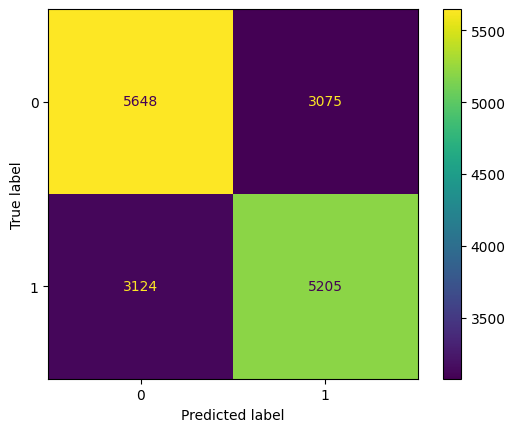

In [37]:
ConfusionMatrixDisplay(cm).plot()

In [38]:
dtc2 = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dtc2.fit(X_train_transformerd,y_train)
pred = dtc2.predict(X_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [39]:
print(accuracy)
print(recall)

0.7281843771991555
0.6553007563933245


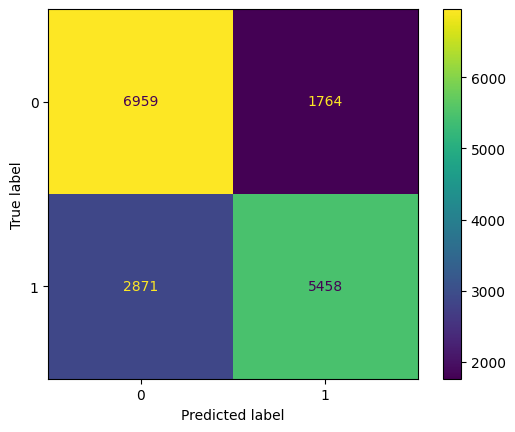

In [40]:

ConfusionMatrixDisplay(cm).plot()

HypertTuning Decision Tree

In [41]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [42]:
param_dict = {
                'criterion': ['gini','entropy'],
                'max_depth': [5,6,7],
                'max_features': [7,8,9,10,12,15],
                'min_samples_split': [8,10,12],
                }

randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
randomcv.fit(X_train_transformerd,y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, ...], 'max_features': [7, 8, ...], 'min_samples_split': [8, 10, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchange

In [43]:
cv_pred = randomcv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7293572601454374


In [44]:
cv_pred = randomcv.predict(X_test_transformerd)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7339969758064516


In [45]:
randomcv.best_params_

{'min_samples_split': 10,
 'max_features': 8,
 'max_depth': 6,
 'criterion': 'gini'}

In [46]:
best_dtc = randomcv.best_estimator_

In [47]:
best_dtc.fit(X_train_transformerd,y_train)
best_pred = best_dtc.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7249589490968801
0.7555118663109114


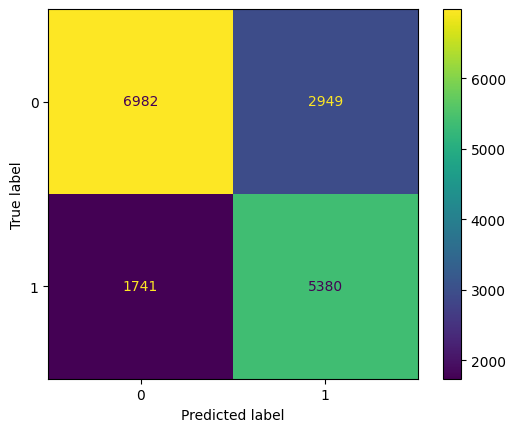

In [48]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [49]:
best_dtc

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",8
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

Prototyping for User Input for unseen data

In [50]:
# best_dtc.predict()

X_train_transformerd.shape

(51153, 12)

In [51]:
X_train.shape

(51153, 12)

In [52]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi'],
      dtype='object')

In [63]:
# df.head()

In [64]:
# Age | Objective Feature | age | int (days)
# Height | Objective Feature | height | int (cm) |
# Weight | Objective Feature | weight | float (kg) |
# Gender | Objective Feature | gender | categorical code |
# Systolic blood pressure | Examination Feature | ap_hi | int |
# Diastolic blood pressure | Examination Feature | ap_lo | int |
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
# Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
# Smoking | Subjective Feature | smoke | binary |
# Alcohol intake | Subjective Feature | alco | binary |
# Physical activity | Subjective Feature | active | binary |
# Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [65]:
# gender = int(input('gendern:  M/F').lower())
# height = int(input("height in cms"))
# weight = int(input("weight in Kg"))
# ap_hi = int(input("ap_hi"))
# ap_lo = int(input("ap_hi"))
# Cholesterol = int(input('Cholesterol:  Normal , Above Normal , Well- Above Normal').lower())
# Gluc = int(input(" Gluc : Normal , Above Normal , Well- Above Normal").lower())
# Smoking = int(input("Smoke : Yes/No").lower())
# alco = int(input("Alco : Yes/No").lower())
# active = int(input("Active: Yes/NO"))
# age = int(input("Age in Years"))
# bmi = float(input("BMI"))
# Bp_Cat = input("Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2,  Hypertensive Crisis").lower()


# user_input = [gender,height, weight, ap_hi, ap_lo, Cholesterol,Gluc, Smoking, Gluc, Smoking, alco, active, age, Bp_Cat ]


# # # gender

# # if gender == 'm':
# #     gen = 2
# # else:
# #     gen = 1

# # # cholesterol 

# # if Cholesterol == 'normal':
# #     chol = 1
# # elif Cholesterol == "above Normal":
# #     chol = 2
# # elif  Cholesterol == 'Well Above Normal':
# #     chol = 3




In [66]:
# user_input = [gender,height, weight, ap_hi, ap_lo, Cholesterol,Gluc, Smoking, Gluc, Smoking, alco, active, age ]
# userinput_cat = [Bp_Cat]

In [67]:
# arrayinput_num = np.array(user_input).reshape(1, -1)
# arrayinput_cat = np.array(userinput_cat).reshape(1, -1)

In [68]:
# ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),arrayinput_num),
#                                      ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),arrayinput_cat)],
#                         remainder='passthrough')

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [54]:
rfc.fit(X_train_transformerd, y_train)
preds = rfc.predict(X_test_transformerd)

acc = accuracy_score(y_test, preds)
rec_score = recall_score(y_test, preds)
pres = precision_score(y_test,preds)


print(acc)
print(rec_score)
print(pres)

0.7095941825005865
0.7004442310001201
0.7036545651911712


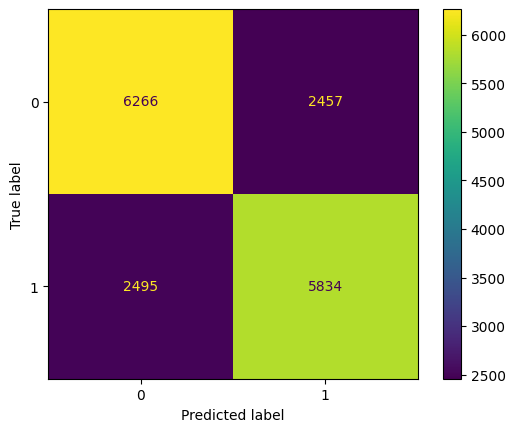

In [55]:
cm  = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()

In [56]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [57]:
params = {
 'criterion': ['gini','entropy'],
 'max_depth': [12,7,8,9,6,11,15],
 'min_samples_split': [5,7,9,11,3,8,10],
 'n_estimators': [100, 110, 150, 210, 250]}

In [58]:
rfc_tuning = RandomizedSearchCV(param_distributions=params,estimator=rfc, cv = 15)
rfc_tuning.fit(X_train_transformerd, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [12, 7, ...], 'min_samples_split': [5, 7, ...], 'n_estimators': [100, 110, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionch

In [59]:
rfc_pred = rfc.predict(X_test_transformerd)

In [60]:
acc = accuracy_score(y_test, rfc_pred)
rec = recall_score(y_test, rfc_pred)

print(acc)
print(rec)

0.7095941825005865
0.7004442310001201


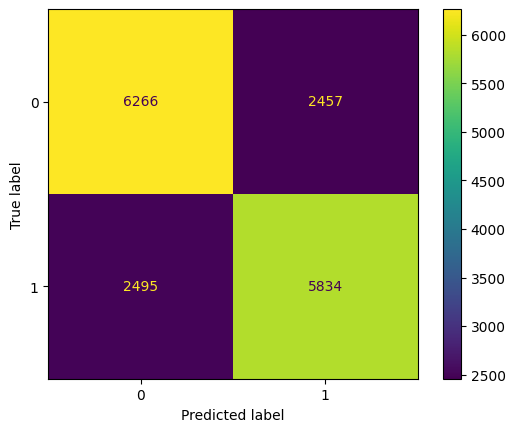

In [65]:
cm = confusion_matrix(y_test, rfc_pred)
ConfusionMatrixDisplay(cm).plot()

In [66]:
best_rfc_params = rfc_tuning.best_estimator_

In [67]:
best_rfc_params.fit(X_train_transformerd, y_train)
preds = best_rfc_params.predict(X_test_transformerd)

In [68]:
acc = accuracy_score(y_test, preds)
rec = recall_score(y_test, preds)

print(acc)
print(rec)

0.7328759089842833
0.6760715572097491


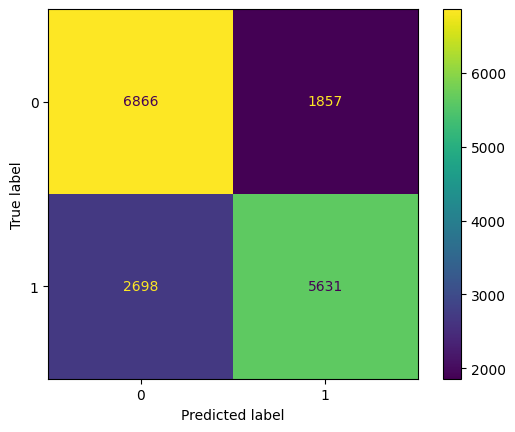

In [69]:
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()

In [70]:
from xgboost import XGBClassifier

In [71]:
xgb = XGBClassifier()

xgb.fit(X_train_transformerd, y_train)
xgb_pred = xgb.predict(X_test_transformerd)

accuracy_score(xgb_pred, y_test)
recall_score(xgb_pred, y_test)
precision_score(xgb_pred, y_test)

0.6927602353223676

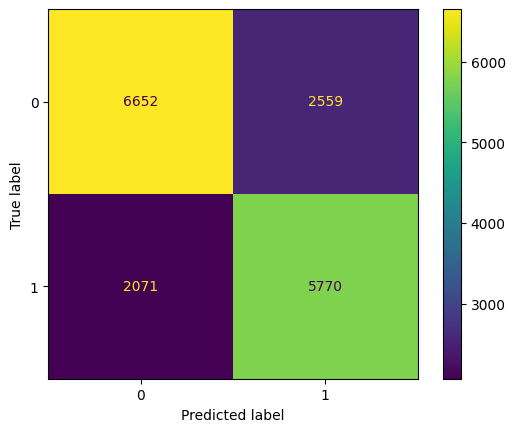

In [72]:
cm = confusion_matrix(xgb_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

In [74]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [85]:
parama = {'objective': ['binary:logistic'],
 'gamma': [0, 0.1, 0.2, 0.6],
 'learning_rate': [0.01, 0.001, 0.1],
 'max_depth':[4,5,7,8,3,9],
 'n_estimators': [100, 110, 150, 210, 250]
 }

In [86]:
rsv = RandomizedSearchCV(param_distributions= params, estimator=xgb)
rsv.fit(X_train_transformerd, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['gini', 'entropy'], 'max_depth': [12, 7, ...], 'min_samples_split': [5, 7, ...], 'n_estimators': [100, 110, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... v

In [87]:
xg_pred = rsv.predict(X_test_transformerd)

In [88]:
accuracy_score(xg_pred, y_test)
recall_score(xg_pred, y_test)
precision_score(xg_pred, y_test)

0.6927602353223676

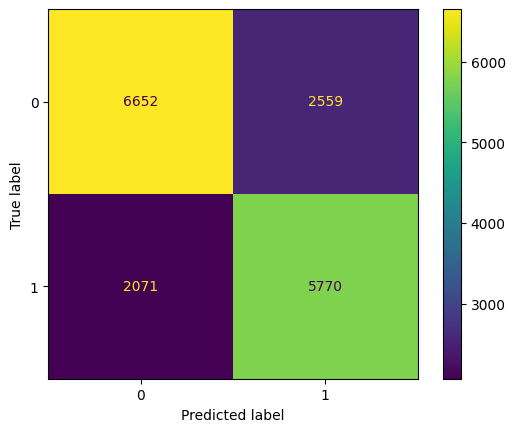

In [89]:
cm = confusion_matrix(xgb_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

In [90]:
best_rsv = rsv.best_estimator_

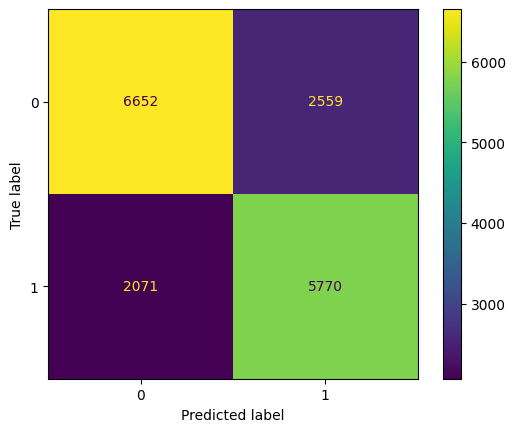

In [91]:
best_rsv.fit(X_train_transformerd, y_train)
final_rsv = best_rsv.predict(X_test_transformerd)

accuracy_score(final_rsv, y_test)
recall_score(final_rsv, y_test)
precision_score(final_rsv, y_test)


cm = confusion_matrix(xgb_pred, y_test)
ConfusionMatrixDisplay(cm).plot()

In [94]:
best_dtc

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",8
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [93]:
import pickle

In [97]:
with open('Decision_tree_tunining', 'wb') as file:
    pickle.dump(best_dtc, file)